In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

# Import Data

In [2]:
coc2021 = pd.read_excel ('/Users/lakisha/Desktop/Data Science/HUD 2021 CoC Homeless Assistance Program Housing Inventory Report.xlsx')

# Wrangle Data

In [3]:
x = coc2021[['Adult Only Beds', 'Child Only Beds', 'Youth Beds', 'Family Beds', 'Family Units']]
y = coc2021['Total Yr Round Beds']

# Train Test Split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5, 5) (5,)
(4, 5) (4,)


# Create Linear Regression Model

In [6]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Examine Predictions

In [7]:
predictions = lm.predict(x_test)
predictions

array([ 53877.37238274, 376662.45539859, 597880.29509812, 307891.21852089])

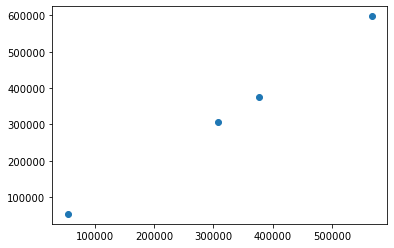

In [8]:
plt.scatter(y_test, predictions)

# Accuracy Score

In [9]:
print("Score:", lm.score(x_test, y_test))

Score: 0.9933051309293803


# Data Accurate 99% of the time

# Examine Error

# Mean Absolute Error (MAE)

In [10]:
metrics.mean_absolute_error(y_test, predictions)

7548.4983903443335

# Mean Squared Error (MSE)

In [11]:
metrics.mean_squared_error(y_test, predictions)

226643139.0255823

# Root Mean Squared Error (RMSE)

In [12]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

15054.671667810704

# k-Fold Cross Validation 

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create Folds

In [14]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [0 1 3 4 5 7], test: [2 6 8]
train: [2 3 4 5 6 8], test: [0 1 7]
train: [0 1 2 6 7 8], test: [3 4 5]


/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
